<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/tytanci1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd '/content/drive/MyDrive/tytanic/tytanic'

/content/drive/MyDrive/tytanic/tytanic


In [51]:
ls

cleandata.csv  train.csv  unitytanic,csv


In [71]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import os

In [53]:
tytanic_data=pd.read_csv('/content/drive/MyDrive/tytanic/tytanic/train.csv')

In [54]:
tytanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


we are going to consider `survived` and `age`

In [55]:
unitytanic_data=tytanic_data[['Survived','Age']]
unitytanic_data.head(10)

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


In [56]:
unitytanic_data.to_csv('unitytanic,csv')

## Data visulization

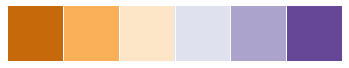

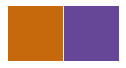

In [57]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr',6)
pal.as_hex()

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors)  
sns.palplot(sns.color_palette(sns_colors)) 

In [58]:
tytanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
unitytanic_data.columns

Index(['Survived', 'Age'], dtype='object')

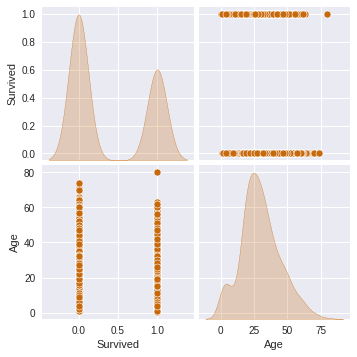

In [60]:
sns.pairplot(unitytanic_data,
            x_vars=['Survived','Age'],
            y_vars=['Survived','Age'],
             diag_kind='kde'
             )

##Data Splits

In [61]:
trainDataset=unitytanic_data.sample(frac=0.8,random_state=0)
testDataset=unitytanic_data.drop(trainDataset.index)
print(trainDataset.head())
print(testDataset.head())

     Survived   Age
495         0   NaN
648         0   NaN
278         0   7.0
31          1   NaN
255         1  29.0
    Survived   Age
9          1  14.0
11         1  58.0
19         1   NaN
23         1  28.0
28         1   NaN


In [62]:
print(trainDataset.shape)
print(testDataset.shape)

(713, 2)
(178, 2)


In [63]:
trainFeatures=trainDataset.copy()
testFeatures=testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     Survived   Age
495         0   NaN
648         0   NaN
278         0   7.0
31          1   NaN
255         1  29.0
    Survived   Age
9          1  14.0
11         1  58.0
19         1   NaN
23         1  28.0
28         1   NaN


In [64]:
trainLabels = trainFeatures.pop('Age')
testLabels = testFeatures.pop('Age')

print(trainLabels.head())
print(testLabels.head())

495     NaN
648     NaN
278     7.0
31      NaN
255    29.0
Name: Age, dtype: float64
9     14.0
11    58.0
19     NaN
23    28.0
28     NaN
Name: Age, dtype: float64


In [65]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [69]:
model.compile(
    loss='mean_abslute_error',
    optimizer= tf.keras.optimizers.Adam(0.001),
    metrics=['mae','mse']
)

In [72]:
numEpochs=300
history= model.fit(x=trainFeatures,y=trainLables,validation_data=(testFeatures,testLabels),
                  epochs=300)

Epoch 1/300


ValueError: ignored